In [ ]:
import pandas as pd
import numpy as np
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
%matplotlib inline
import seaborn as sns
import missingno as msno
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import plotly.offline as py
from wordcloud import WordCloud, STOPWORDS

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Description

In [ ]:
df = pd.read_csv('Levels_Fyi_Salary_Data.csv')

In [ ]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [ ]:
# Missing data percentage of each column
missing = df.isna().sum() 
print("The percentage of each feature's missing values are as follow:")
round(missing / len(df) * 100, 2)

The percentage of each feature's missing values are as follow:


timestamp                   0.00
company                     0.01
level                       0.19
title                       0.00
totalyearlycompensation     0.00
location                    0.00
yearsofexperience           0.00
yearsatcompany              0.00
tag                         1.36
basesalary                  0.00
stockgrantvalue             0.00
bonus                       0.00
gender                     31.19
otherdetails               35.93
cityid                      0.00
dmaid                       0.00
rowNumber                   0.00
Masters_Degree              0.00
Bachelors_Degree            0.00
Doctorate_Degree            0.00
Highschool                  0.00
Some_College                0.00
Race_Asian                  0.00
Race_White                  0.00
Race_Two_Or_More            0.00
Race_Black                  0.00
Race_Hispanic               0.00
Race                       64.20
Education                  51.52
dtype: float64

In [ ]:
#nonzeros in each column 
df.astype(bool).sum(axis=0)

timestamp                  62642
company                    62642
level                      62642
title                      62642
totalyearlycompensation    62642
location                   62642
yearsofexperience          58039
yearsatcompany             46726
tag                        62642
basesalary                 60338
stockgrantvalue            45464
bonus                      47215
gender                     62642
otherdetails               62642
cityid                     62640
dmaid                      52816
rowNumber                  62642
Masters_Degree             15391
Bachelors_Degree           12605
Doctorate_Degree            1803
Highschool                   320
Some_College                 355
Race_Asian                 11772
Race_White                  8032
Race_Two_Or_More             804
Race_Black                   690
Race_Hispanic               1130
Race                       62642
Education                  62642
dtype: int64

<AxesSubplot:>

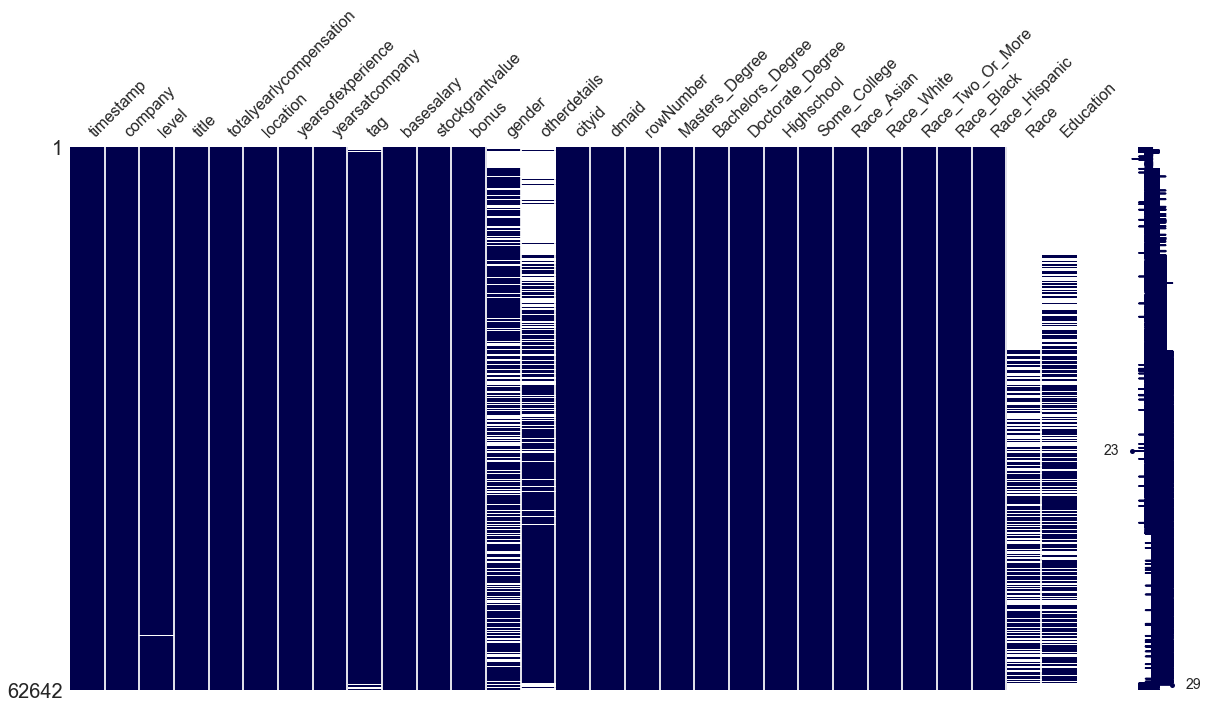

In [ ]:
# Dispersion Plot of each column
msno.matrix(df, figsize=(20, 10), color=(0., 0., 0.3))


In [ ]:
# Correlation of each column
df.corr()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
totalyearlycompensation,1.000000,0.422879,0.165802,0.672865,0.770756,0.489454,-0.110204,0.376346,-0.092622,0.018320,-0.139866,0.097179,-0.014831,-0.003380,-0.080072,-0.027802,-0.009623,-0.026741,-0.026145
yearsofexperience,0.422879,1.000000,0.522611,0.374437,0.289631,0.261051,-0.014100,0.030903,-0.002836,0.060310,-0.069468,-0.005380,0.011605,0.037925,-0.052659,0.064712,-0.013917,-0.022675,-0.002232
yearsatcompany,0.165802,0.522611,1.000000,0.145596,0.089492,0.108122,0.002984,0.043946,-0.012850,0.026109,-0.027487,0.001165,-0.005947,0.005718,-0.025888,0.047267,-0.014926,-0.027812,-0.007511
basesalary,0.672865,0.374437,0.145596,1.000000,0.468266,0.394352,-0.118651,0.425342,0.032603,0.084227,-0.104111,0.104320,-0.008534,0.006494,-0.053759,0.020324,0.002090,-0.008836,-0.008976
stockgrantvalue,0.770756,0.289631,0.089492,0.468266,1.000000,0.248151,-0.072429,0.227608,-0.041226,0.010720,-0.084676,0.080768,-0.008617,-0.001778,-0.040439,-0.020978,-0.006071,-0.029244,-0.020412
bonus,0.489454,0.261051,0.108122,0.394352,0.248151,1.000000,-0.036119,0.143506,-0.014753,0.031538,-0.062881,0.071844,-0.006916,-0.001873,-0.022997,-0.007798,0.001773,-0.004026,-0.006983
cityid,-0.110204,-0.014100,0.002984,-0.118651,-0.072429,-0.036119,1.000000,-0.104870,0.041289,-0.012902,0.053934,-0.018686,-0.012253,-0.005339,0.056143,-0.019097,-0.002999,0.012547,-0.003174
dmaid,0.376346,0.030903,0.043946,0.425342,0.227608,0.143506,-0.104870,1.000000,-0.202626,0.003325,-0.159571,0.040339,-0.038118,-0.009232,-0.093969,-0.087129,-0.009182,-0.005076,-0.010163
rowNumber,-0.092622,-0.002836,-0.012850,0.032603,-0.041226,-0.014753,0.041289,-0.202626,1.000000,0.181295,0.351730,0.029668,0.052255,0.050012,0.358515,0.261340,0.076943,0.068616,0.086191
Masters_Degree,0.018320,0.060310,0.026109,0.084227,0.010720,0.031538,-0.012902,0.003325,0.181295,1.000000,-0.286083,-0.076072,-0.040896,-0.043087,0.305903,0.036552,0.011023,0.014023,0.002330


<AxesSubplot:>

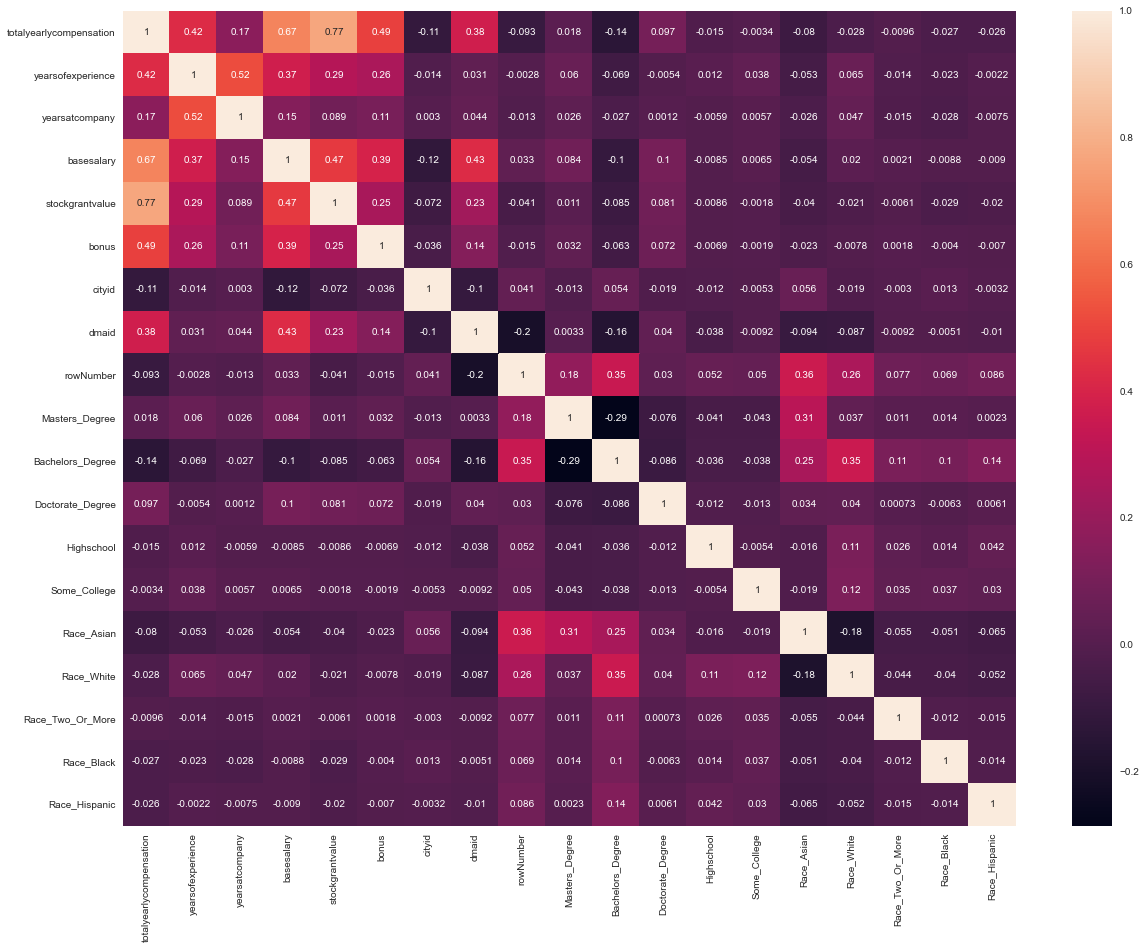

In [ ]:
fig = plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot=True)

# Data Cleaning

In [ ]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [ ]:
#Drop columns with no predicting power
df = df.drop(['cityid', 'dmaid','rowNumber','tag','otherdetails'], axis=1)
df = df.replace("", np.nan)

In [ ]:
df[df['basesalary'] == 0]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
5,6/21/2017 17:27:47,Microsoft,63,Software Engineer,208000,"Seattle, WA",8.5,8.5,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
8,6/22/2017 23:08:16,Microsoft,59,Software Engineer,120000,"Redmond, WA",3.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
12,7/3/2017 19:28:09,Microsoft,63,Product Manager,150000,"Redmond, WA",10.0,10.0,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11007,9/17/2019 0:07:31,Apple,ICT3,Software Engineer,240000,"Cupertino, CA",10.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
14957,1/14/2020 16:53:56,Facebook,E4,Software Engineer,195000,"Menlo Park, CA",3.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,Master's Degree
14974,1/14/2020 21:41:27,IBM,Senior Technical Staff Member,Software Engineer,240000,"San Francisco, CA",15.0,10.0,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
14979,1/14/2020 23:09:20,Spotify,Staff Engineer,Software Engineer,310000,"New York, NY",9.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


### Gender

In [ ]:
df['gender'] = df['gender'].fillna('Unknown')
df = df[df['gender']!='Title: Senior Software Engineer']
# df = pd.get_dummies(df,columns=["gender"] )

### Location

In [ ]:
# Only include records that are in the U.S.
df_l = df['location'].str.split(',', expand=True)
df_l = df_l.iloc[:,:3]
df_l.columns = ['City', 'State', 'Country']
df_l['Country'] = df_l['Country'].fillna('United States')
df = pd.concat([df, df_l], axis=1)
df = df.drop(["location"],axis =1)
df = df[df['Country'] == "United States"]


In [ ]:
# check if all values in State columns are in the 50 state list
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
df_state = list(pd.unique(df['State']))
l = []
for i in df_state:
  if i[1:] not in states:
    l.append(i[1:])
l
# the list is empty, so all values are correct

[]

In [ ]:
# Filter top 10 states
top_ten_states = list(df.State.value_counts().nlargest(10).index)
filt = top_ten_states
df = df[df["State"].isin(filt)]

### Title

In [ ]:
# Only include 5 major titles 
filt = ["Software Engineer","Product Manager","Software Engineering Manager","Data Scientist","Hardware Engineer"]
df = df[df["title"].isin(filt)]

### Timestamp

In [ ]:
# Create categories for Timestamp column, extract Year
df['Year'] = pd.DatetimeIndex(df['timestamp']).year

### Company

In [ ]:
#Only include top 7 companies for analysis
df = df[(df["company"]=="Amazon") | (df["company"]=="Microsoft")|(df["company"]=="Google")|(df["company"]=="Facebook")|(df["company"]=="Apple")|(df["company"]=="Oracle")|(df["company"]=="Salesforce")]

### Outliers

In [ ]:
outlier_detect_df = df[['totalyearlycompensation','yearsofexperience','yearsatcompany','basesalary','stockgrantvalue','bonus']]

array([[<AxesSubplot:xlabel='totalyearlycompensation', ylabel='totalyearlycompensation'>,
        <AxesSubplot:xlabel='yearsofexperience', ylabel='totalyearlycompensation'>,
        <AxesSubplot:xlabel='yearsatcompany', ylabel='totalyearlycompensation'>,
        <AxesSubplot:xlabel='basesalary', ylabel='totalyearlycompensation'>,
        <AxesSubplot:xlabel='stockgrantvalue', ylabel='totalyearlycompensation'>,
        <AxesSubplot:xlabel='bonus', ylabel='totalyearlycompensation'>],
       [<AxesSubplot:xlabel='totalyearlycompensation', ylabel='yearsofexperience'>,
        <AxesSubplot:xlabel='yearsofexperience', ylabel='yearsofexperience'>,
        <AxesSubplot:xlabel='yearsatcompany', ylabel='yearsofexperience'>,
        <AxesSubplot:xlabel='basesalary', ylabel='yearsofexperience'>,
        <AxesSubplot:xlabel='stockgrantvalue', ylabel='yearsofexperience'>,
        <AxesSubplot:xlabel='bonus', ylabel='yearsofexperience'>],
       [<AxesSubplot:xlabel='totalyearlycompensation', ylabel=

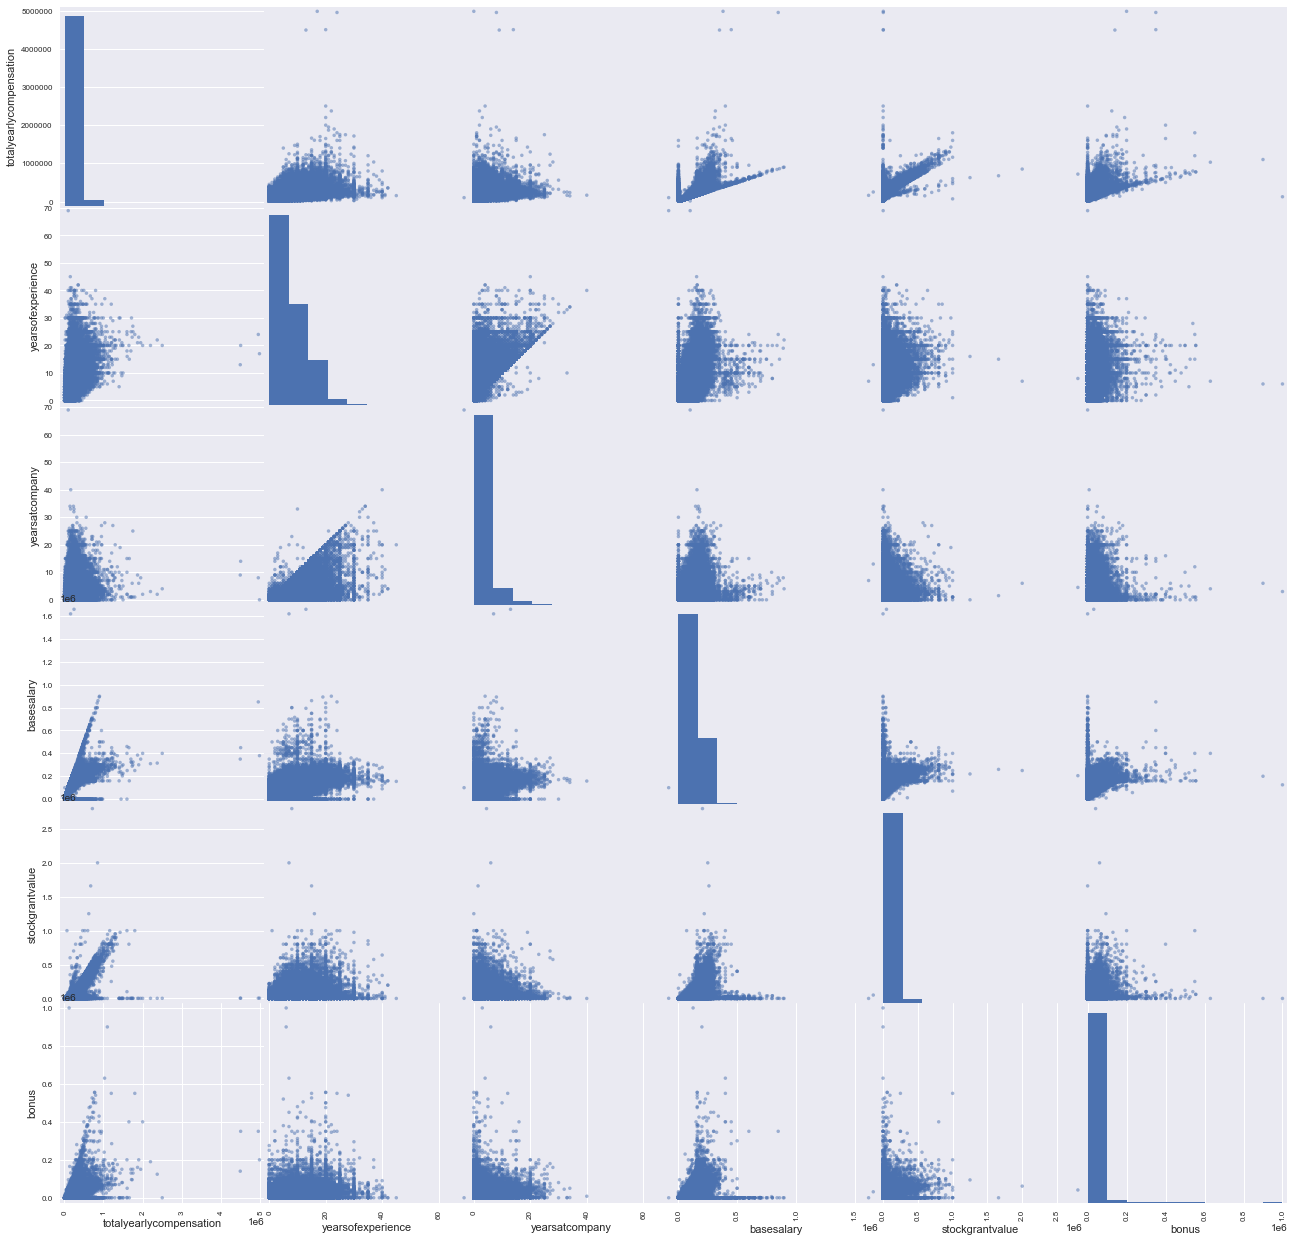

In [ ]:
pd.plotting.scatter_matrix(outlier_detect_df, alpha=0.5, figsize=(22,22))

#### For reference:
<li>Outliers in our dataset:
        <li>- total_yearly_compensation > 4000000
        <li>- years_at_company > years_of_experience

<li>There is no linear relationship between working experience and salary


D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totalyearlycompensation', ylabel='Density'>

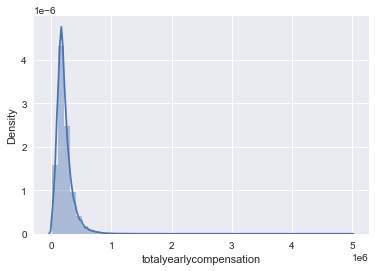

In [ ]:
sns.distplot(df['totalyearlycompensation'])

In [ ]:
df['totalyearlycompensation'].describe()

count    6.264100e+04
mean     2.163006e+05
std      1.380348e+05
min      1.000000e+04
25%      1.350000e+05
50%      1.880000e+05
75%      2.640000e+05
max      4.980000e+06
Name: totalyearlycompensation, dtype: float64

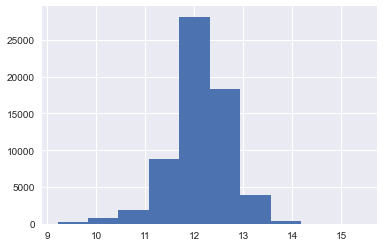

In [ ]:
#log transformation for right skewness
df['totalyearlycompensation'] = np.log(df['totalyearlycompensation'])
plt.hist(df.totalyearlycompensation)
plt.show()

In [ ]:
upper_limit = df['totalyearlycompensation'].mean() + 3*df['totalyearlycompensation'].std()
lower_limit = df['totalyearlycompensation'].mean() - 3*df['totalyearlycompensation'].std()
df = df[(df['totalyearlycompensation']< upper_limit) & (df['totalyearlycompensation']>lower_limit)]

In [ ]:
df[(df['totalyearlycompensation'] > upper_limit) | (df['totalyearlycompensation'] < lower_limit)]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education


# EDA

### Time Feature

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
year = df.timestamp.dt.year
year_counts = year.value_counts()
year_counts

2020    23651
2021    22944
2019    11108
2018     3883
2017      185
Name: timestamp, dtype: int64

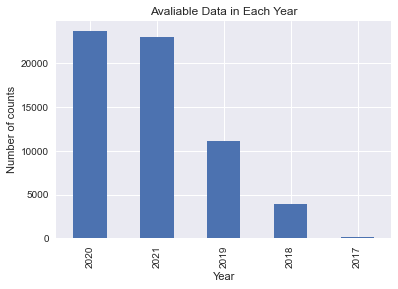

In [ ]:
year_counts.plot(kind='bar',title='Avaliable Data in Each Year')
plt.xlabel('Year')
plt.ylabel("Number of counts")
plt.show()

### Location feature

In [ ]:
text = df['State'].tolist()
def listToString(s): 
    
    str1 = ""  
    for ele in s: 
        str1 += ele  
 
    return str1

In [ ]:
text = listToString(text)

In [ ]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('State.jpg')
plt.show()

In [ ]:
af = df['State'].value_counts()
s = af.to_frame()
s.reset_index(inplace=True)

for i in range(10):
    s['index'][i] = s['index'][i].strip()

for j in range(len(states)):
    if states[j] not in list(s['index']): 
        s=s.append({'index': states[j], 'State': 0}, ignore_index=True)
        


In [ ]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],[0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = s['index'],
        z = s['State'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Count of employees"
        )
    ) ]

layout = dict(
        title = 'STEM employees working base map',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
    
fig = dict( data=data, layout=layout )

url = py.plot(fig, filename='d3-cloropleth-map' )

### Company Feature

In [ ]:
print(df.company.nunique())
print(df.company.value_counts())

1619
Amazon              8081
Microsoft           5183
Google              4311
Facebook            2965
Apple               2022
                    ... 
lyft                   1
apptio                 1
idemia                 1
Global payments        1
tableau software       1
Name: company, Length: 1619, dtype: int64


In [ ]:
company = df.company.value_counts()[df.company.value_counts() >= 1000]
company = company[:8]

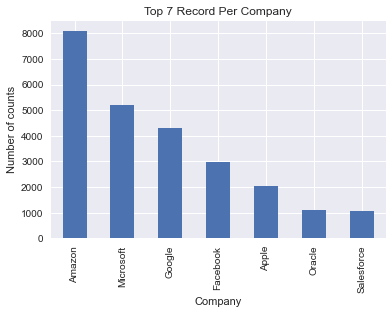

In [ ]:
company.plot(kind='bar',title='Top 7 Record Per Company') 
plt.xlabel('Company')
plt.ylabel("Number of counts")
plt.show()

In [ ]:
# #select top 7 companies for analysis
# df = df[(df["company"]=="Amazon") | (df["company"]=="Microsoft")|(df["company"]=="Google")|(df["company"]=="Facebook")|(df["company"]=="Apple")|(df["company"]=="Oracle")|(df["company"]=="Salesforce")]

<Figure size 2880x2880 with 0 Axes>

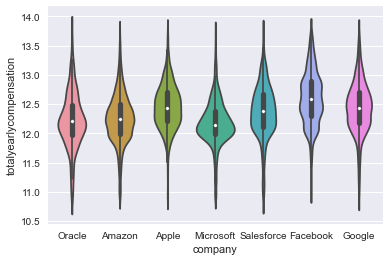

<Figure size 2880x2880 with 0 Axes>

In [ ]:
ax = sns.violinplot(x="company", y="totalyearlycompensation", data=df)
plt.figure(figsize=(40, 40))

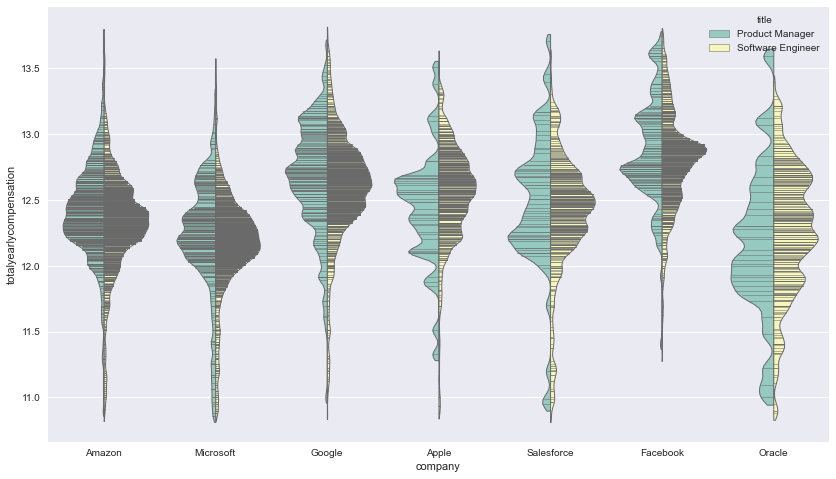

In [ ]:
#advanced visualization to transform the data and graph in a violin plot
#outliers need to be removed

faang = df.query("company in ('Facebook','Amazon','Apple','Salesforce','Google','Microsoft','Oracle') and title in ('Product Manager','Software Engineer') and yearsofexperience>4 and yearsofexperience<16 ")

plt.figure(figsize=(14, 8))
g = sns.violinplot(data=faang, palette="Set3", split = True, x='company',hue='title',y='totalyearlycompensation',
                   inner='stick', bw=.1, cut=1, linewidth=1)



### Title Feature

In [ ]:
#filter title 
# filt = ["Software Engineer","Product Manager","Software Engineering Manager","Data Scientist","Hardware Engineer"]
# df = df[df["title"].isin(filt)]

In [ ]:
df.title.value_counts()

Software Engineer               15689
Product Manager                  2217
Software Engineering Manager     1529
Data Scientist                    856
Hardware Engineer                 741
Name: title, dtype: int64

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yearsofexperience', ylabel='Density'>

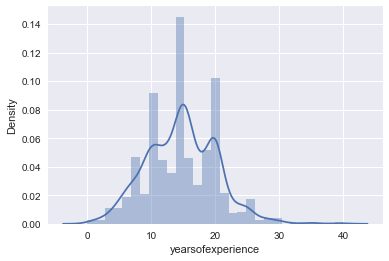

In [ ]:
#If want to dive into a particular title
software_engineering_manager = df[df['title'] == 'Software Engineering Manager']
sns.distplot(software_engineering_manager['yearsofexperience'])

#### Can explore top companies for, say Software Engineer & Product Manager

### Race Feature

In [ ]:
df.groupby('Race').sum()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
Race,,,,,,,,,,,,,,,,
Asian,43291.235610,22273.0,8339.0,511951000.0,257751000.0,78715000.0,1970,1252,211,11,7,3525,0,0,0,0
Black,1950.634533,854.0,254.0,22039000.0,8339000.0,3708000.0,50,96,2,2,6,0,0,0,160,0
Hispanic,4240.508657,2263.0,733.0,49666000.0,21385000.0,7824000.0,93,209,20,10,4,0,0,0,0,346
Two Or More,2816.142570,1483.0,516.0,34224000.0,18286000.0,6721000.0,67,129,12,6,7,0,0,228,0,0
White,25284.205762,16870.0,5901.0,316626000.0,173702000.0,49425000.0,630,1067,166,44,58,0,2042,0,0,0


In [ ]:
df.Race.value_counts()

Asian          3525
White          2042
Hispanic        346
Two Or More     228
Black           160
Name: Race, dtype: int64

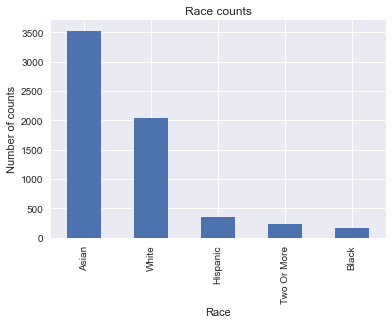

In [ ]:
df.Race.value_counts().plot(kind='bar')
plt.xlabel("Race")
plt.ylabel("Number of counts")
plt.title("Race counts")
plt.show()

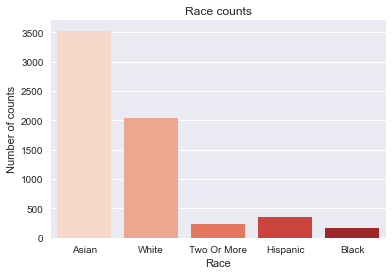

In [ ]:
sns.countplot(data = df, x = 'Race', palette="Reds")
plt.xlabel("Race")
plt.ylabel("Number of counts")
plt.title("Race counts")
plt.show()

### Education Level

In [ ]:
df.groupby('Education').sum()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
Education,,,,,,,,,,,,,,,,
Bachelor's Degree,37673.786721,19151.0,7604.0,434731000.0,211050000.0,65613000.0,0,3078,0,0,0,1252,1066,129,96,209
Highschool,980.233095,592.0,172.0,11560000.0,5298000.0,1728000.0,0,0,0,80,0,11,44,6,2,10
Master's Degree,63127.230101,38336.0,12528.1,781866000.0,406319000.0,121978000.0,5107,1,45,0,0,1970,630,67,50,93
PhD,9671.073059,5120.0,1817.0,133573000.0,89628000.0,25815000.0,0,0,767,0,0,211,166,12,2,20
Some College,1068.891012,953.0,237.0,14160000.0,7661000.0,2300000.0,0,0,0,0,86,7,58,7,6,4


In [ ]:
df.Education.value_counts()

Master's Degree      5107
Bachelor's Degree    3078
PhD                   767
Some College           86
Highschool             80
Name: Education, dtype: int64

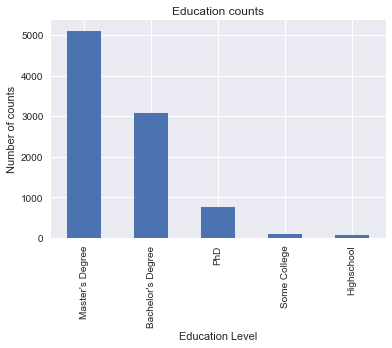

In [ ]:
df.Education.value_counts().plot(kind='bar')
plt.xlabel("Education Level")
plt.ylabel("Number of counts")
plt.title("Education counts")
plt.show()

<AxesSubplot:xlabel='Education', ylabel='count'>

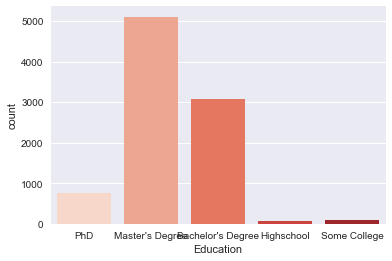

In [ ]:
sns.countplot(data = df, x = 'Education', palette="Reds")

### Gender Feature

In [ ]:
df.groupby('gender').sum()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
gender,,,,,,,,,,,,,,,,
Female,24926.385833,11216.75,4340.000,2.882166e+08,122880315.0,44493350.0,731,465,95,1,9,602,254,42,29,44
Male,153201.920714,89578.15,32095.226,1.816773e+09,953364344.0,289155002.0,3825,2469,585,72,72,2912,1770,170,130,298
Other,1439.681117,775.00,279.500,1.641600e+07,9034000.0,4456000.0,29,10,6,2,2,1,9,13,1,4
Unknown,80173.719755,47933.45,17536.850,9.017785e+08,510489958.0,143812474.0,522,135,126,5,3,10,9,3,0,0


<AxesSubplot:>

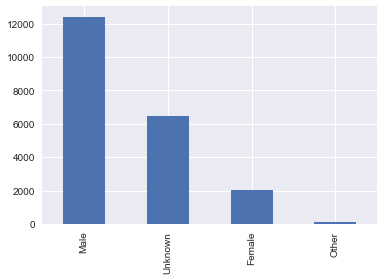

In [ ]:
df.gender.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='gender', ylabel='count'>

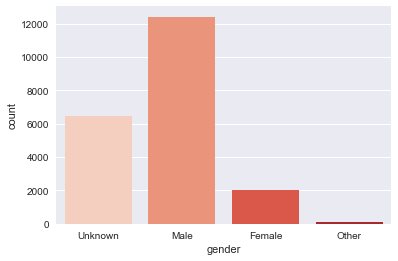

In [ ]:
sns.countplot(data = df, x = 'gender', palette="Reds")

### Yearly Compensation

<h4> Can discover relationships b/w totalyearlycompensation & different features </h4>
<li> Years at the company, toal years of experience
<li> Gender, race, educational level
<li> Location, company, job title, level
<li> Compensation for xxx(job title) by race/education/location...
<li> Compensation for xxx(job title) across companies

In [ ]:
cond_mean = df["totalyearlycompensation"].groupby(df["Education"]).aggregate("mean")
cond_std = df["totalyearlycompensation"].groupby(df["Education"]).aggregate("std")
print(cond_mean)
print(cond_std)

Education
Bachelor's Degree    12.239697
Highschool           12.252914
Master's Degree      12.360922
PhD                  12.608961
Some College         12.428965
Name: totalyearlycompensation, dtype: float64
Education
Bachelor's Degree    0.473118
Highschool           0.446621
Master's Degree      0.431589
PhD                  0.395556
Some College         0.476997
Name: totalyearlycompensation, dtype: float64


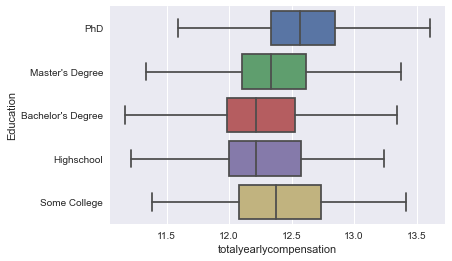

In [ ]:
#Outliers removed version
ax = sns.boxplot(x="totalyearlycompensation", y="Education", data=df, showfliers = False)

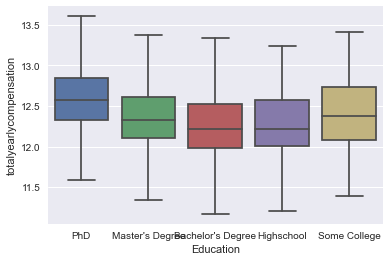

In [ ]:
ax = sns.boxplot(x="Education", y="totalyearlycompensation", data=df, orient = "v", showfliers = False)

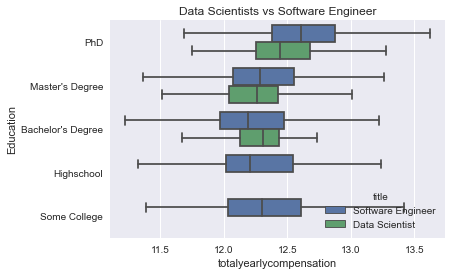

In [ ]:
# A way to discover the influence of job titles
my_job = ["Data Scientist","Software Engineer"]
data_t = df[df["title"].isin(my_job)]
ax = sns.boxplot(x="totalyearlycompensation", y="Education", data=data_t, hue = "title", orient = "h", showfliers = False)
ax.set_title("Data Scientists vs Software Engineer")
plt.show()

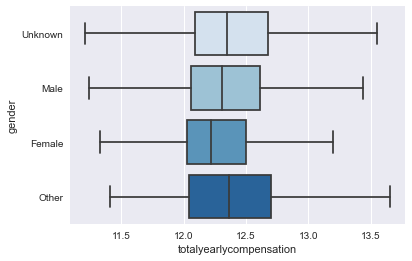

In [ ]:
ax = sns.boxplot(x="totalyearlycompensation", y="gender", data=df, palette="Blues", showfliers = False)

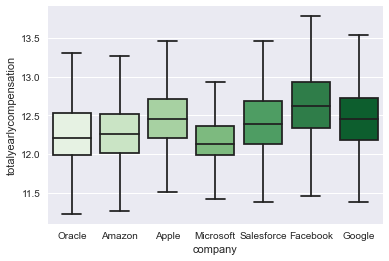

In [ ]:
ax = sns.boxplot(x="company", y="totalyearlycompensation", data=df, palette="Greens", showfliers = False)

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


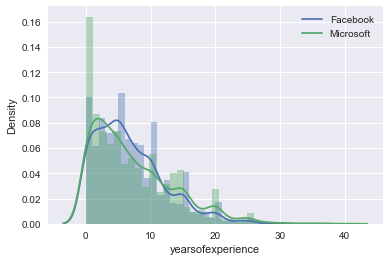

In [ ]:
# Comparing FB & MS (Q1 of FB is almost the same as Q3 of MS)

facebook = df[df['company'] == 'Facebook']
microsoft = df[df['company'] == 'Microsoft']
sns.distplot(facebook['yearsofexperience'])
sns.distplot(microsoft['yearsofexperience'])

plt.legend(['Facebook', 'Microsoft'])
plt.show()

# Data Modeling

## Feature Selection

In [ ]:
# Save dataset with all features, before one hot encoding
df_no_dummy = df[['company','title','totalyearlycompensation','yearsofexperience','yearsatcompany','gender', 'Race','Education','State', 'Year' ]]
df_no_dummy = df_no_dummy.reset_index(drop=True)
df_no_dummy.to_csv('cleaned_no_dummy.csv')


In [ ]:
# Save dataset with all features, after one hot encoding
df_dummy = df.drop(['timestamp', 'level', 'basesalary', 'stockgrantvalue', 'bonus', 'City', 'Country','Race','Education'], axis=1)
df_dummy = df_dummy.reset_index(drop=True)
df_dummy = pd.get_dummies(df_dummy,columns=["company"] )
df_dummy = pd.get_dummies(df_dummy,columns=["title"] )
df_dummy = pd.get_dummies(df_dummy,columns=["State"] )
df_dummy = pd.get_dummies(df_dummy,columns=["Year"] )
df_dummy = pd.get_dummies(df_dummy,columns=["gender"] )
df_dummy.to_csv('cleaned_dummy.csv')

In [ ]:
cc = pd.read_csv("cleaned_dummy.csv",index_col=0)

In [ ]:
cc.columns,cc.shape

(Index(['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany',
        'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool',
        'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More',
        'Race_Black', 'Race_Hispanic', 'company_Amazon', 'company_Apple',
        'company_Facebook', 'company_Google', 'company_Microsoft',
        'company_Oracle', 'company_Salesforce', 'title_Data Scientist',
        'title_Hardware Engineer', 'title_Product Manager',
        'title_Software Engineer', 'title_Software Engineering Manager',
        'State_ CA', 'State_ CO', 'State_ DC', 'State_ GA', 'State_ MA',
        'State_ NY', 'State_ PA', 'State_ TX', 'State_ VA', 'State_ WA',
        'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
        'gender_Female', 'gender_Male', 'gender_Other', 'gender_Unknown'],
       dtype='object'),
 (18404, 44))

In [ ]:
df_dummy=cc.copy()
df_dummy.shape

(18404, 44)

In [ ]:
#df_dummy['totalyearlycompensation'] = df_dummy['totalyearlycompensation'].apply(lambda x: np.log1p(x))
#df_dummy['yearsofexperience'] = df_dummy['yearsofexperience'].apply(lambda x: np.log1p(x))
#df_dummy['yearsatcompany'] = df_dummy['yearsatcompany'].apply(lambda x: np.log1p(x))

In [ ]:
train, test=train_test_split(df_dummy,test_size=0.2)
#valid, test=train_test_split(test, test_size=0.45)
train.shape[0],test.shape[0]#valid.shape[0]

(14723, 3681)

In [ ]:
## standardize features 
TrainingX=train.iloc[:,1:-1]
Trainingy=train.iloc[:,0]
#ValidationX=valid.iloc[:,1:-1]
#Validationy=valid.iloc[:,0]
TestingX=test.iloc[:,1:-1]
Testingy=test.iloc[:,0]

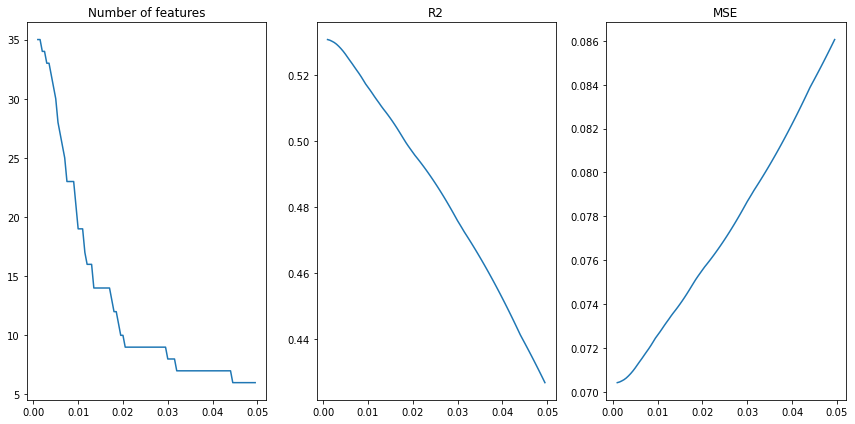

In [ ]:
modelX=StandardScaler().fit(TrainingX)
TrainingXsd=pd.DataFrame(modelX.transform(TrainingX))
#ValidationXsd=pd.DataFrame(modelX.transform(ValidationX))
TestingXsd=pd.DataFrame(modelX.transform(TestingX))

def Routofsample(Actual, Prediction):
    #R2=1-np.sum((Prediction-Actual)**2)/np.sum((Actual-np.mean(Actual))**2)
    R2 = r2_score(Actual, Prediction)
    return R2
def Lasso_function(a):
    model=Lasso(alpha=a, fit_intercept=False)
    model.fit(TrainingXsd,Trainingy-np.mean(Trainingy))
    Prediction=model.predict(TestingXsd)+np.mean(Trainingy)
    return np.sum(~(model.coef_==0)), Routofsample(Testingy, Prediction), mse(Testingy, Prediction)
  
alpha_array= np.arange(0.001,0.05,0.0005)
returns=np.array([Lasso_function(alpha) for alpha in alpha_array])
Number_Variables=returns[:,0]
R2=returns[:,1]
MSE=returns[:,2]

fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
ax1.plot(alpha_array,Number_Variables)
ax1.title.set_text("Number of features")
ax2.plot(alpha_array,R2)
ax2.title.set_text("R2")
ax3.plot(alpha_array,MSE)
ax3.title.set_text("MSE")
fig.tight_layout()
plt.show()

In [ ]:
best_alpha=alpha_array[np.argmax(R2)]
print("best alpha", best_alpha)
print("corresponding R2",np.max(R2))

best alpha 0.001
corresponding R2 0.5308470398188898


In [ ]:
def Lasso_function(best_alpha):
    model=Lasso(alpha=best_alpha, fit_intercept=False)
    model.fit(TrainingXsd,Trainingy-np.mean(Trainingy))
    Prediction=model.predict(TestingXsd)+np.mean(Trainingy)
    return model.coef_

selected_feature = df_dummy.columns[1:-1][~(Lasso_function(best_alpha)==0)]
selected_feature

Index(['yearsofexperience', 'yearsatcompany', 'Masters_Degree',
       'Doctorate_Degree', 'Highschool', 'Some_College', 'Race_Asian',
       'Race_White', 'Race_Black', 'Race_Hispanic', 'company_Amazon',
       'company_Apple', 'company_Facebook', 'company_Google',
       'company_Microsoft', 'company_Oracle', 'title_Data Scientist',
       'title_Hardware Engineer', 'title_Product Manager',
       'title_Software Engineering Manager', 'State_ CA', 'State_ CO',
       'State_ DC', 'State_ GA', 'State_ MA', 'State_ NY', 'State_ PA',
       'State_ TX', 'State_ VA', 'Year_2017', 'Year_2018', 'Year_2021',
       'gender_Female', 'gender_Male', 'gender_Other'],
      dtype='object')

In [ ]:
Reweighted_coefficient=Lasso_function(best_alpha)/TrainingX.std()
Reweighted_coefficient=Reweighted_coefficient[Reweighted_coefficient!=0]
Reweighted_coefficient

yearsofexperience                     0.033556
yearsatcompany                        0.008748
Masters_Degree                        0.025895
Doctorate_Degree                      0.195504
Highschool                           -0.051312
Some_College                         -0.080790
Race_Asian                           -0.006856
Race_White                           -0.015118
Race_Black                           -0.063401
Race_Hispanic                        -0.086234
company_Amazon                       -0.069169
company_Apple                         0.051214
company_Facebook                      0.255309
company_Google                        0.093060
company_Microsoft                    -0.188482
company_Oracle                       -0.166347
title_Data Scientist                 -0.026785
title_Hardware Engineer              -0.074062
title_Product Manager                 0.032089
title_Software Engineering Manager    0.230492
State_ CA                             0.042017
State_ CO    

In [ ]:
len(Reweighted_coefficient),df_dummy.shape[1]
len(selected_feature)

(35, 44)

In [ ]:
# dropped features
df_dummy.columns[1:-1][(Lasso_function(best_alpha)==0)]

Index(['Bachelors_Degree', 'Race_Two_Or_More', 'company_Salesforce',
       'title_Software Engineer', 'State_ WA', 'Year_2019', 'Year_2020'],
      dtype='object')

## Fit Model


In [ ]:
#Trainingy=train.iloc[:,0]
#Validationy=valid.iloc[:,0]
#Testingy=test.iloc[:,0]

In [ ]:
# print model accuracy
def model_result(model, X_train,y_train,X_test, y_test):
    print("--------- Testing Accuracy ----------")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Testing R_square:",r2_score(y_test, y_pred))
    print('Testing Mean Squared Error:',mse(y_test, y_pred))
    print("--------- Training Accuracy ----------")
    y_train_pred = model.predict(X_train)
    print("Training R_square:",r2_score(y_train, y_train_pred))
    print('Training Mean Squared Error:',mse(y_train, y_train_pred))

    return y_pred

In [ ]:
# search for best parameters
def parameter_search(regressor, X_train, y_train, hyperF):
    gridF = GridSearchCV(regressor, hyperF, cv = 3, verbose = 1, n_jobs = -1, scoring='neg_mean_squared_error')
    gridF.fit(X_train, y_train)
    return gridF.best_params_

### Linear Regression 

In [ ]:
lr_train = train[selected_feature]
#lr_val = valid[selected_feature]
lr_test = test[selected_feature]
 
lr_scaler = MinMaxScaler()
lr_scaler.fit(lr_train)
lr_train = lr_scaler.transform(lr_train)
#lr_val = lr_scaler.transform(lr_val)
lr_test = lr_scaler.transform(lr_test)
# fit model & check accuracy
lr_model = LinearRegression()
lr_test_pred = model_result(lr_model, lr_train, Trainingy, lr_test, Testingy)


--------- Testing Accuracy ----------
Testing R_square: 0.545975492023981
Testing Mean Squared Error: 0.0689614355731131
--------- Training Accuracy ----------
Training R_square: 0.5479751221406026
Training Mean Squared Error: 0.07108854558673645


In [ ]:
# Linear regression without selecting features
#lr_scaler = MinMaxScaler()
#lr_scaler.fit(TrainingX)
#lr_train = lr_scaler.transform(TrainingX)
#lr_val = lr_scaler.transform(lr_val)
#lr_test = lr_scaler.transform(TestingX)
# fit model & check accuracy
lr_model = LinearRegression()
lr_test_pred = model_result(lr_model, TrainingX, Trainingy, TestingX, Testingy)

--------- Testing Accuracy ----------
Testing R_square: 0.5460054977583546
Testing Mean Squared Error: 0.06895687802504802
--------- Training Accuracy ----------
Training R_square: 0.5479954316174761
Training Mean Squared Error: 0.07108535157852301


### Random Forest 

In [ ]:
rf_train = train[selected_feature]
#rf_val = valid[selected_feature]
rf_test = test[selected_feature]
# fit model & check accuracy
rf_model = RandomForestRegressor(n_estimators=50, max_depth=7, random_state=0, n_jobs=-1)
rf_test_pred = model_result(rf_model, rf_train, Trainingy, rf_test, Testingy)


--------- Testing Accuracy ----------
Testing R_square: 0.5900153306039744
Testing Mean Squared Error: 0.06169886996823199
--------- Training Accuracy ----------
Training R_square: 0.6132531609163838
Training Mean Squared Error: 0.06096443899671257


In [ ]:
# hyperparameter tuning by GridSearchCV
n_estimators = [300]
max_depth = [15, 16, 17, 18]
min_samples_split = [38, 39, 40, 41]
min_samples_leaf = [2, 3]
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
            min_samples_leaf = min_samples_leaf)

best_param = parameter_search(rf_model, rf_train, Trainingy, hyperF)
print('best parameters:', best_param)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  3.6min finished


best parameters: {'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 39, 'n_estimators': 300}


In [ ]:
# fit model using best parameters
rf_best_model = RandomForestRegressor(n_estimators=300, max_depth=16, min_samples_leaf=2, min_samples_split=39, random_state=0, n_jobs=-1)
rf_test_pred = model_result(rf_best_model, rf_train, Trainingy, rf_test, Testingy)


--------- Testing Accuracy ----------
Testing R_square: 0.6147967020136054
Testing Mean Squared Error: 0.057969504637353335
--------- Training Accuracy ----------
Training R_square: 0.6913212103163282
Training Mean Squared Error: 0.04865826256741728


In [ ]:
# generate importance of features
importance = rf_best_model.fit(rf_train, Trainingy).feature_importances_
feature_score = list(zip(list(selected_feature), importance))
feature_score.sort(key = lambda x: x[1], reverse=True)
fs = pd.DataFrame(importance, index=selected_feature, columns=['Importance'])
fs.sort_values(by=['Importance'], inplace=True)

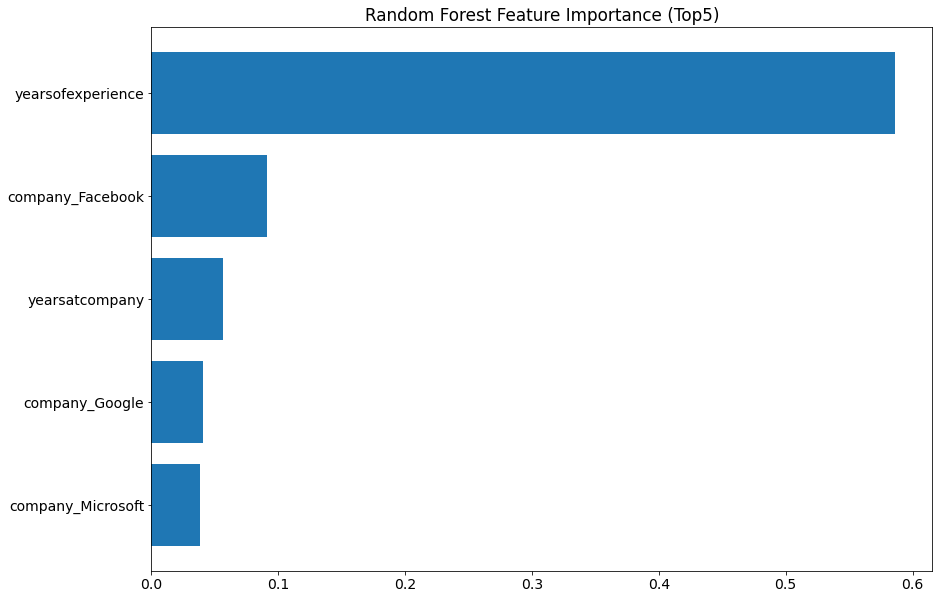

In [ ]:
plt.figure(figsize=(14, 10))
plt.barh(fs[-5:].index, fs['Importance'][-5:])
plt.title('Random Forest Feature Importance (Top5)')
plt.rcParams["font.size"] = "14"
plt.show()

### KNN

In [ ]:
knn_train = train[selected_feature]
#knn_val = valid[selected_feature]
knn_test = test[selected_feature]

knn_scaler = MinMaxScaler()
knn_scaler.fit(knn_train)
knn_train = knn_scaler.transform(knn_train)
#knn_val = knn_scaler.transform(knn_val)
knn_test = knn_scaler.transform(knn_test)
 
knn_model = KNeighborsRegressor(n_neighbors=4, leaf_size=13)
knn_test_pred = model_result(knn_model, knn_train, Trainingy, knn_test, Testingy)


--------- Testing Accuracy ----------
Testing R_square: 0.4877962029940456
Testing Mean Squared Error: 0.07708189556273058
--------- Training Accuracy ----------
Training R_square: 0.7028076792857756
Training Mean Squared Error: 0.04684760488128139


In [ ]:
# hyperparameter tuning by GridSearchCV
n_neighbors = [8, 9, 11, 15]
leaf_size = [1, 3, 4, 5, 6]
hyperF = dict(n_neighbors = n_neighbors, leaf_size = leaf_size)

best_param = parameter_search(knn_model, knn_train, Trainingy, hyperF)
print('best parameters:', best_param)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.8min finished


best parameters: {'leaf_size': 5, 'n_neighbors': 9}


In [ ]:
# fit model using best parameters
knn_best_model = KNeighborsRegressor(n_neighbors=9, leaf_size=5, n_jobs=-1)
knn_test_pred = model_result(knn_best_model, knn_train, Trainingy, knn_test, Testingy)

--------- Testing Accuracy ----------
Testing R_square: 0.5206547287325305
Testing Mean Squared Error: 0.07213699381829908
--------- Training Accuracy ----------
Training R_square: 0.6242390257178836
Training Mean Squared Error: 0.059232693532149466


### XGB

In [ ]:
xgb_train = train[selected_feature]
#xgb_val = valid[selected_feature]
xgb_test = test[selected_feature]
xgb_model = XGBRegressor()
xgb_test_pred = model_result(xgb_model, xgb_train, Trainingy, xgb_test, Testingy)

--------- Testing Accuracy ----------
Testing R_square: 0.6193712763847375
Testing Mean Squared Error: 0.057134891102510285
--------- Training Accuracy ----------
Training R_square: 0.7400026436835585
Training Mean Squared Error: 0.04099966814346164


In [ ]:
# hyperparameter tuning by GridSearchCV
hyperF = {'n_estimators': [300],
          'max_depth': [6, 7, 8],
          'min_child_weight': [29, 30, 31],
          'learning_rate': [0.05]}
#hyperF = dict(n_neighbors = n_neighbors, leaf_size = leaf_size)

best_param = parameter_search(xgb_model, xgb_train, Trainingy, hyperF)
print('best parameters:', best_param)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.0min finished


best parameters: {'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 30, 'n_estimators': 300}


In [ ]:
# fit model using best parameters
xgb_best_model = XGBRegressor(n_estimators=300, max_depth=7, min_child_weight=30, learning_rate=0.05)
xgb_test_pred = model_result(xgb_best_model, xgb_train, Trainingy, xgb_test, Testingy)

--------- Testing Accuracy ----------
Testing R_square: 0.626928427704182
Testing Mean Squared Error: 0.056000512662594946
--------- Training Accuracy ----------
Training R_square: 0.6753964600698165
Training Mean Squared Error: 0.05118758745812994


In [ ]:
# generate importance of features
importance = xgb_best_model.fit(xgb_train, Trainingy).feature_importances_
feature_score = list(zip(list(selected_feature), importance))
feature_score.sort(key = lambda x: x[1], reverse=True)
fs = pd.DataFrame(importance, index=selected_feature, columns=['Importance'])
fs.sort_values(by=['Importance'], inplace=True)

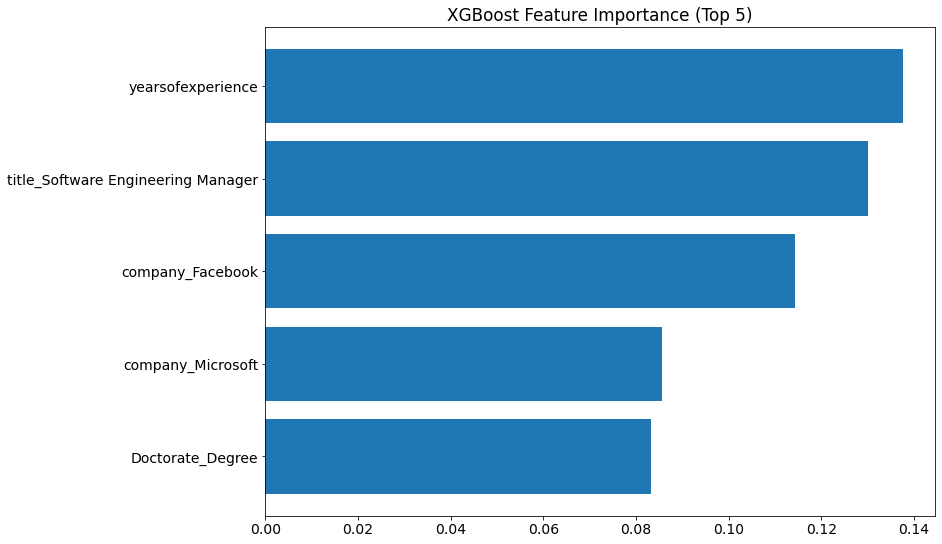

In [ ]:
plt.figure(figsize=(12, 9))
plt.barh(fs[-5:].index, fs['Importance'][-5:])
plt.rcParams["font.size"] = "14"
plt.title("XGBoost Feature Importance (Top 5)")
plt.show()

### SVM

In [ ]:
svr_train = train[selected_feature]
#svr_val = valid[selected_feature]
svr_test = test[selected_feature]

svr_model = SVR(kernel = 'rbf')
knn_test_pred = model_result(svr_model, svr_train, Trainingy, svr_test, Testingy)


--------- Testing Accuracy ----------
Testing R_square: 0.6086932537420202
Testing Mean Squared Error: 0.06140995207409381
--------- Training Accuracy ----------
Training R_square: 0.6324388558309393
Training Mean Squared Error: 0.057344676137154944


In [ ]:
# hyperparameter tuning by GridSearchCV
param_grid = {'C': [6, 9, 10, 11],
              'kernel': ['rbf', 'sigmoid']}

best_param = parameter_search(svr_model, svr_train, Trainingy, param_grid)
print('best parameters:', best_param)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.3min finished


best parameters: {'C': 9, 'kernel': 'rbf'}


In [ ]:
# fit model using best parameters
svr_best_model = SVR(C=9, kernel='rbf')
svr_test_pred = model_result(svr_best_model, svr_train, Trainingy, svr_test, Testingy)

--------- Testing Accuracy ----------
Testing R_square: 0.612323165174373
Testing Mean Squared Error: 0.06084028980983266
--------- Training Accuracy ----------
Training R_square: 0.655574574317861
Training Mean Squared Error: 0.05373518066985741
